# Analysis of Sephora Products

We've all bought products from Sephora at some point in our lives and it can be very fascinating to know more about their products and the different categories of products available at Sephora, which is exactly what I will be doing in this project!

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


![](https://i.imgur.com/G8hwEnf.jpg)


With products from nearly 340 brands, Sephora is undoubtedly one of the most popular cosmetic stores in the world. They sell a wide range of beauty products both online and in store. Many customers often post reviews of their products online, and this can be very useful for other customers to evaluate the pros and cons of a specific product before making a purchase.

It can also be useful for other buyers to know which products have the highest average ratings and how prices affect the quality of products. 

The dataset I have used is called [Sephora Products and Skincare Reviews](https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews) and is available for free on [Kaggle](https://www.kaggle.com/datasets). This analysis is part of the course [Data Analysis with Python: Zero to Pandas](https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas). This course dives deep into doing data analysis with popular python libraries such as Numpy, Pandas, Matplotlib and Seaborn 

## Downloading the Dataset

This dataset consists of 7 csv files:
* **product_info.csv** - Info about all products from the Sephora online store
* **reviews_250_500.csv** - Contains reviews of 249 skincare products
* **reviews_750_1000.csv** - Contains reviews of 249 skincare products
* **reviews_1500_end.csv** - Contains reviews of 1104 skincare products
* **reviews_1000_1500.csv** - Contains reviews of 499 skincare products
* **reviews_0_250.csv**- Contains reviews of 250 skincare products
* **reviews_500_750.csv** - Contains reviews of 249 skincare products

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/nadyinky/sephora-products-and-skincare-reviews'

In [17]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./sephora-products-and-skincare-reviews" (use force=True to force download)


The dataset has been downloaded and extracted.

In [18]:
data_dir = './sephora-products-and-skincare-reviews'

In [19]:
import os
os.listdir(data_dir)

['reviews_250_500.csv',
 'product_info.csv',
 'reviews_750_1000.csv',
 'reviews_1500_end.csv',
 'reviews_1000_1500.csv',
 'reviews_0_250.csv',
 'reviews_500_750.csv']

Let us save and upload our work to Jovian before continuing.

In [20]:
project_name = "Analysis of Sephora Products and Skincare Reviews"

In [21]:
!pip install jovian --upgrade -q

In [22]:
import jovian

In [23]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akkuvilas/analysis-of-sephora-products-and-skincare-reviews" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews


'https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews'

## Data Preparation and Cleaning

We first need to prepare our data for the analysis. Data cleaning involves accounting for null, inaccurate and duplicate values in the dataset




In [24]:
import pandas as pd
import numpy as np

In [25]:
products_df = pd.read_csv(data_dir + '/product_info.csv')

In [26]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

We notice that quite a few columns have null values. Lets see how many null values are present in each column

In [27]:
products_df.isnull().sum()

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

We notice that quite a lot of columns have null values and so we cannot delete all of them. Both ratings and reviews are very important columns for our data analysis so it would not make much sense to include products with no ratings and reviews. Moreover only 3.27% of all products have no ratings so I chose to drop them from the dataset

In [28]:
products_df.dropna(subset=['reviews','rating'],inplace=True)
products_df['size'].fillna('No size',inplace=True)
products_df['variation_type'].fillna('No variation type',inplace=True)
products_df['variation_value'].fillna('No variation value',inplace=True)
products_df['variation_desc'].fillna('No variation description',inplace=True)
products_df['ingredients'].fillna('Not mentioned',inplace=True)
products_df['value_price_usd'].fillna('Not mentioned',inplace=True)
products_df['sale_price_usd'].fillna('Not mentioned',inplace=True)
products_df['highlights'].fillna('Not mentioned',inplace=True)
products_df['secondary_category'].fillna('Not mentioned',inplace=True)
products_df['tertiary_category'].fillna('Not mentioned',inplace=True)
products_df['child_max_price'].fillna('Not mentioned',inplace=True)
products_df['child_min_price'].fillna('Not mentioned',inplace=True)


Now we've accounted for all null values. We can confirm this by running the following command: 

In [29]:
products_df.isnull().any()

product_id            False
product_name          False
brand_id              False
brand_name            False
loves_count           False
rating                False
reviews               False
size                  False
variation_type        False
variation_value       False
variation_desc        False
ingredients           False
price_usd             False
value_price_usd       False
sale_price_usd        False
limited_edition       False
new                   False
online_only           False
out_of_stock          False
sephora_exclusive     False
highlights            False
primary_category      False
secondary_category    False
tertiary_category     False
child_count           False
child_max_price       False
child_min_price       False
dtype: bool

Now that we have accounted for all null values let's begin with the analysis!

In [30]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akkuvilas/analysis-of-sephora-products-and-skincare-reviews" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews


'https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews'

## Exploratory Analysis and Visualization

Lets take a closer look at the attributes of this dataset to see what consumers think of Sephora products



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 22
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Ratings given by customers


We can first take a closer look at the ratings given by customers to get an overall idea of what the customers think of Sephoras products. For this we need to analyze the rating column of the database which gives the average rating of each product. A histogram will be useful to visualize the distribution of ratings across the dataset.

Text(0, 0.5, 'No. of products')

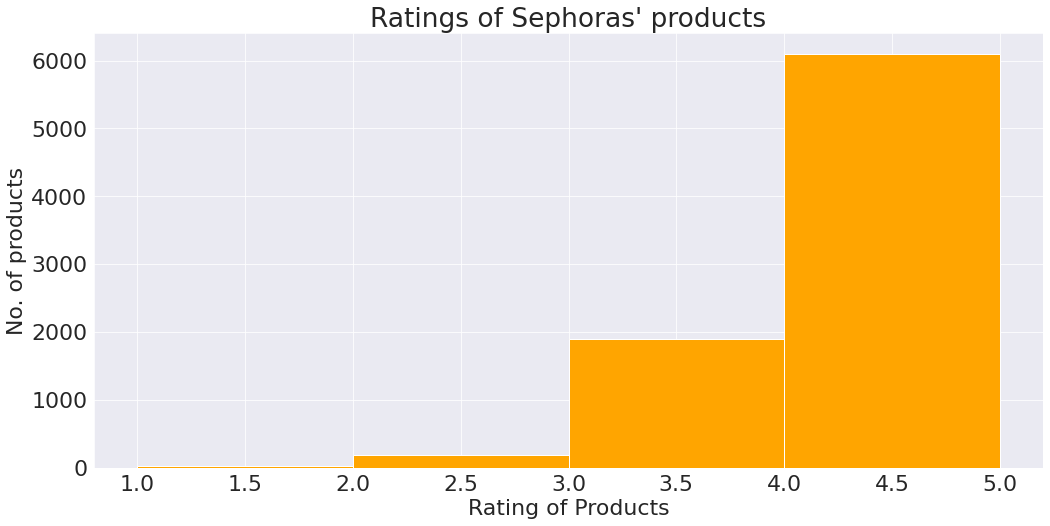

In [33]:
plt.figure(figsize=(17, 8))
plt.title("Ratings of Sephoras' products")
plt.hist(products_df['rating'], bins = np.arange(1,6), color = 'orange');
plt.xlabel("Rating of Products")
plt.ylabel("No. of products")

We observe that customers rate products on a scale of 1 to 5, and more than 6000 ratings are in the range 4 to 5. This gives us an idea that majority of Sephoras' products from this dataset have been received well by customers

Since so many of Sephoras products have been rated quite high, lets analyse the products with the highest ratings. Of the products that have received the highest rating (5), what proportion of them were in the limited edition? How many of them were new products? Lets also look at the proportion of new and limited products to the rest.

We can first create a dataframe having info about products that have the highest rating 

In [34]:
high_rate_df = products_df[products_df['rating'] == 5]

Text(0.5, 1.0, 'Status of products with highest rating')

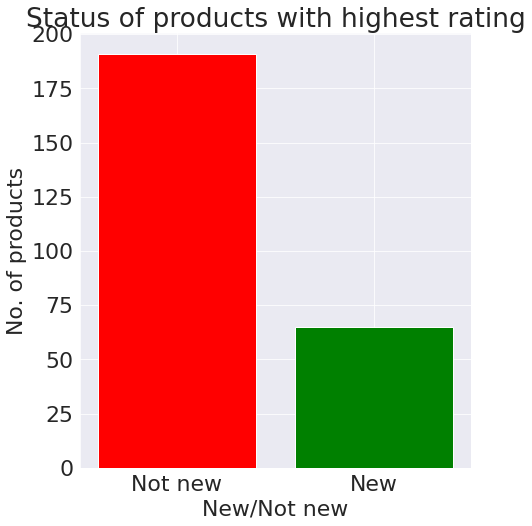

In [35]:
plt.figure(figsize=(7, 8))
counts = high_rate_df['new'].value_counts().to_dict()
plt.bar(['Not new', 'New'], [counts[0], counts[1]], color = ['red','green'])
plt.xlabel("New/Not new")
plt.ylabel("No. of products")
plt.title("Status of products with highest rating")

Turns out quite a few of the products with the highest rating are new. Now lets analyse the product status for all products

Text(0.5, 1.0, 'Status of all products')

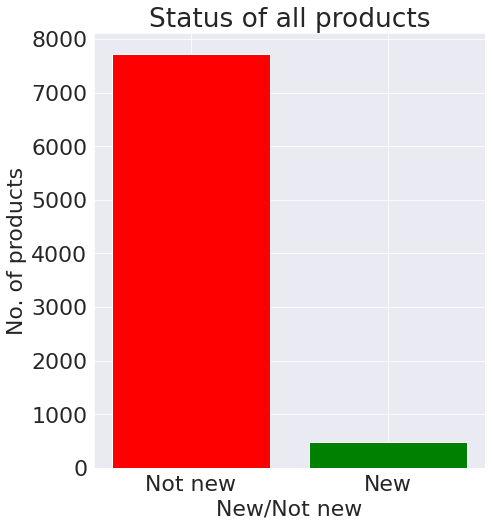

In [36]:
plt.figure(figsize=(7, 8))
counts = products_df['new'].value_counts().to_dict()
plt.bar(['Not new', 'New'], [counts[0], counts[1]], color = ['red','green'])
plt.xlabel("New/Not new")
plt.ylabel("No. of products")
plt.title("Status of all products")

This bar graph tells us that a very small proportion of all products are labeled new.

Lets plot a similar bar chart for products that received the highest rating and are in Limited Edition

Text(0.5, 1.0, 'Limited Edition products among products with highest rating')

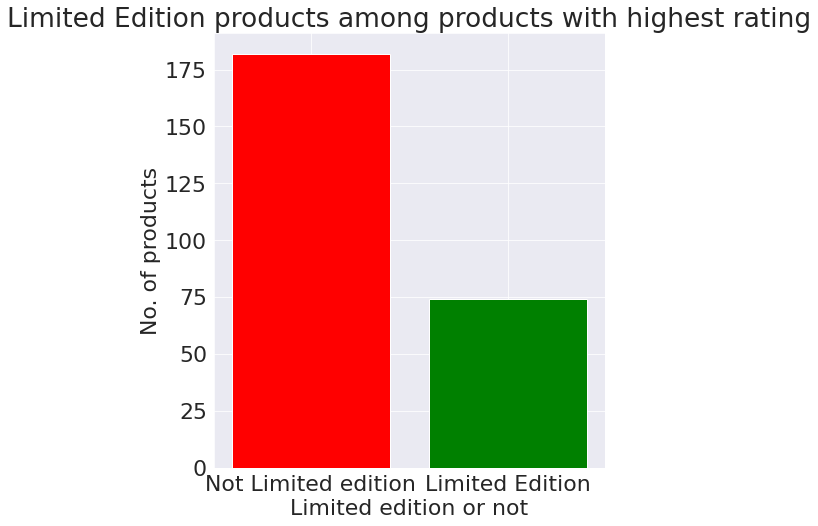

In [37]:
plt.figure(figsize=(7, 8))
counts = high_rate_df['limited_edition'].value_counts().to_dict()
plt.bar(['Not Limited edition', 'Limited Edition'], [counts[0], counts[1]], color = ['red','green'])
plt.xlabel("Limited edition or not")
plt.ylabel("No. of products")
plt.title("Limited Edition products among products with highest rating")

This bar graph gives us an idea about the number of limited edition products among products with the highest rating of 5. Now lets plot a bar chart for products that are in Limited Edition among all products

Text(0.5, 1.0, 'Limited Edition products among all products')

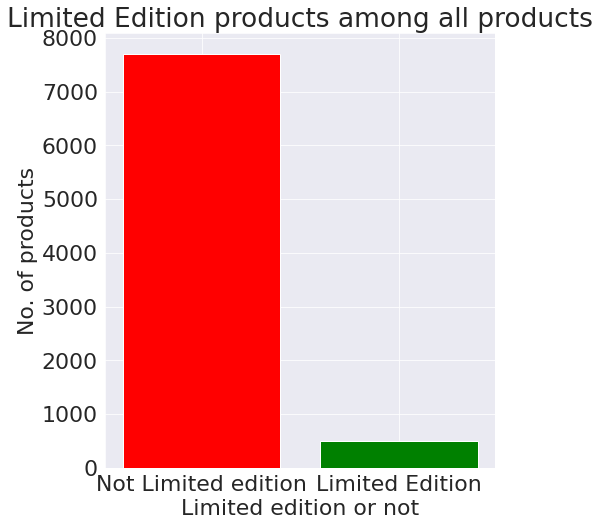

In [38]:
plt.figure(figsize=(7, 8))
counts = products_df['limited_edition'].value_counts().to_dict()
plt.bar(['Not Limited edition', 'Limited Edition'], [counts[0], counts[1]], color = ['red','green'])
plt.ylabel("No. of products")
plt.xlabel("Limited edition or not")
plt.title("Limited Edition products among all products")

Again we notice that a very small proportion of all products are labeled as limited edition. 

Lets take a look at the different categories of products offered at Sephora. The unique() method can give us all the different category names:

In [39]:
products_df['primary_category'].unique()

array(['Fragrance', 'Bath & Body', 'Mini Size', 'Hair', 'Makeup',
       'Skincare', 'Tools & Brushes', 'Men', 'Gifts'], dtype=object)

Now lets see which category has the maximum number of products with the highest rating of 5. We can use a histogram for this purpose

Text(0.5, 1.0, 'Categories of products with highest rating')

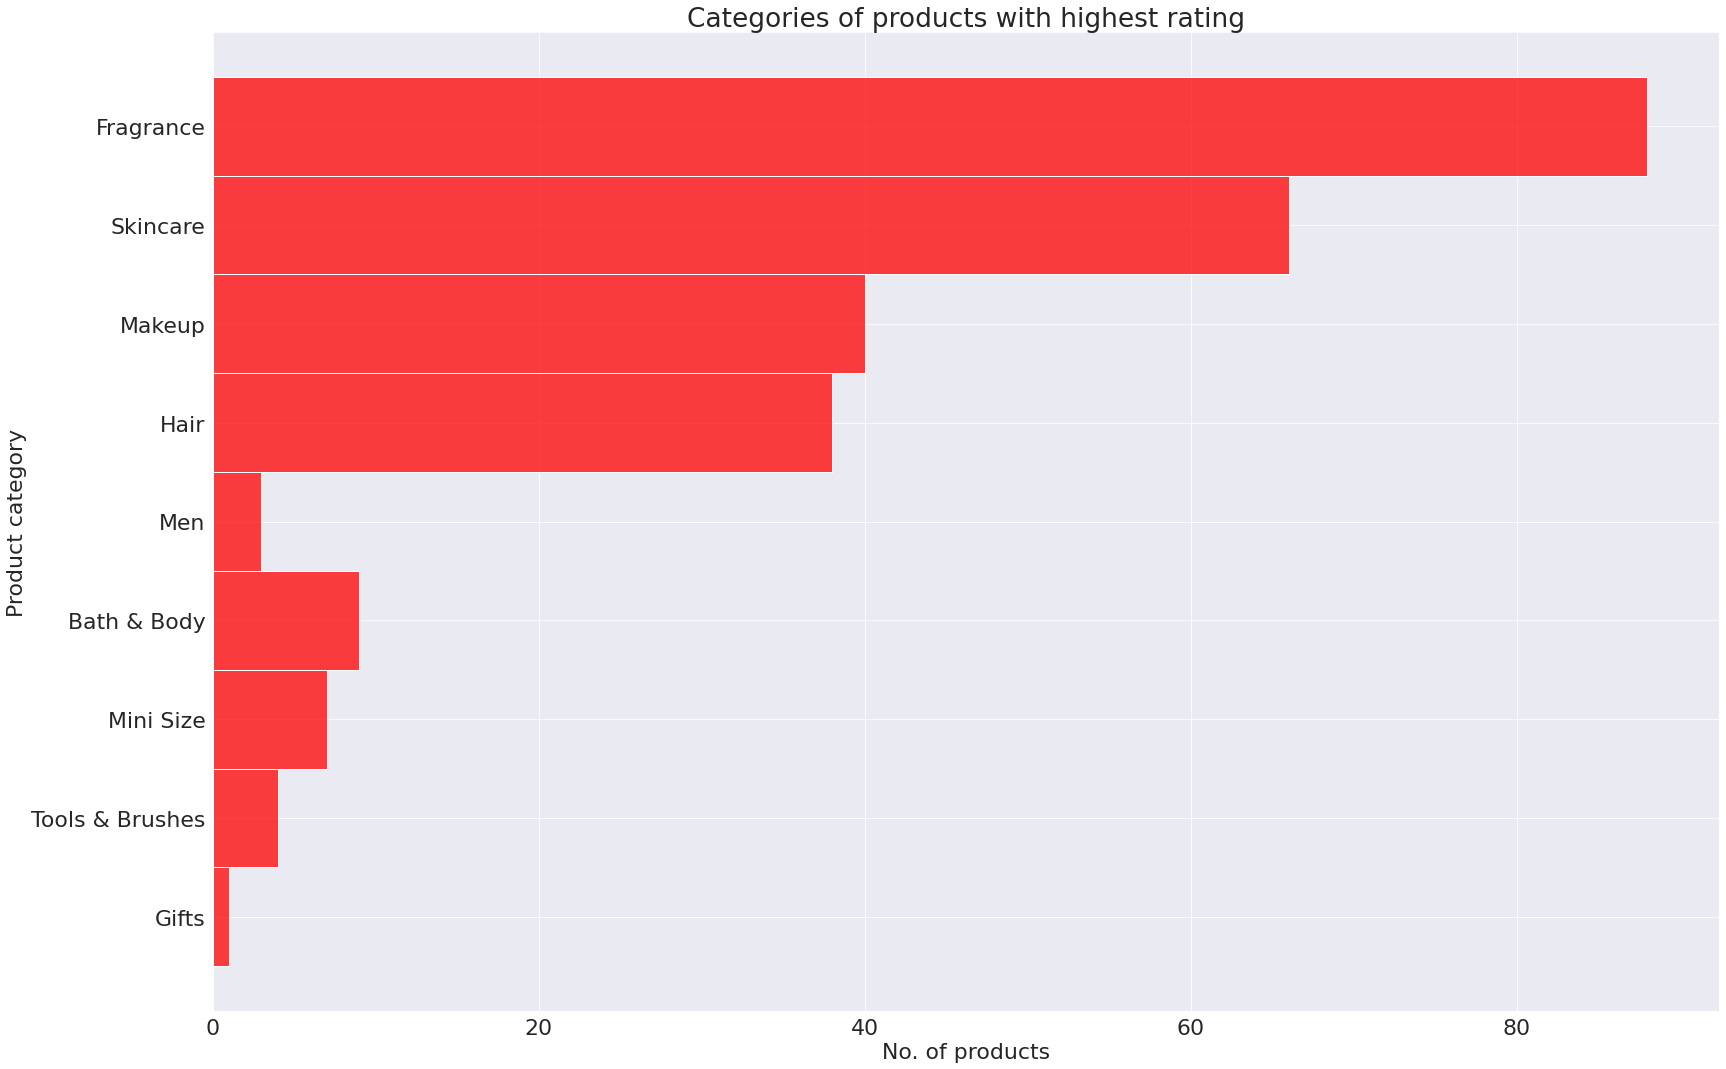

In [40]:
plt.figure(figsize=(27, 18))
sns.histplot(y = high_rate_df['primary_category'],color = 'red')
plt.ylabel("Product category")
plt.xlabel("No. of products")
plt.title("Categories of products with highest rating")

Here we observe that most of the products in the 'Fragrance' category were given a rating of 5. However it will be useful to see how all the products are distributed among these categories.

Text(0.5, 1.0, 'Categories of all products')

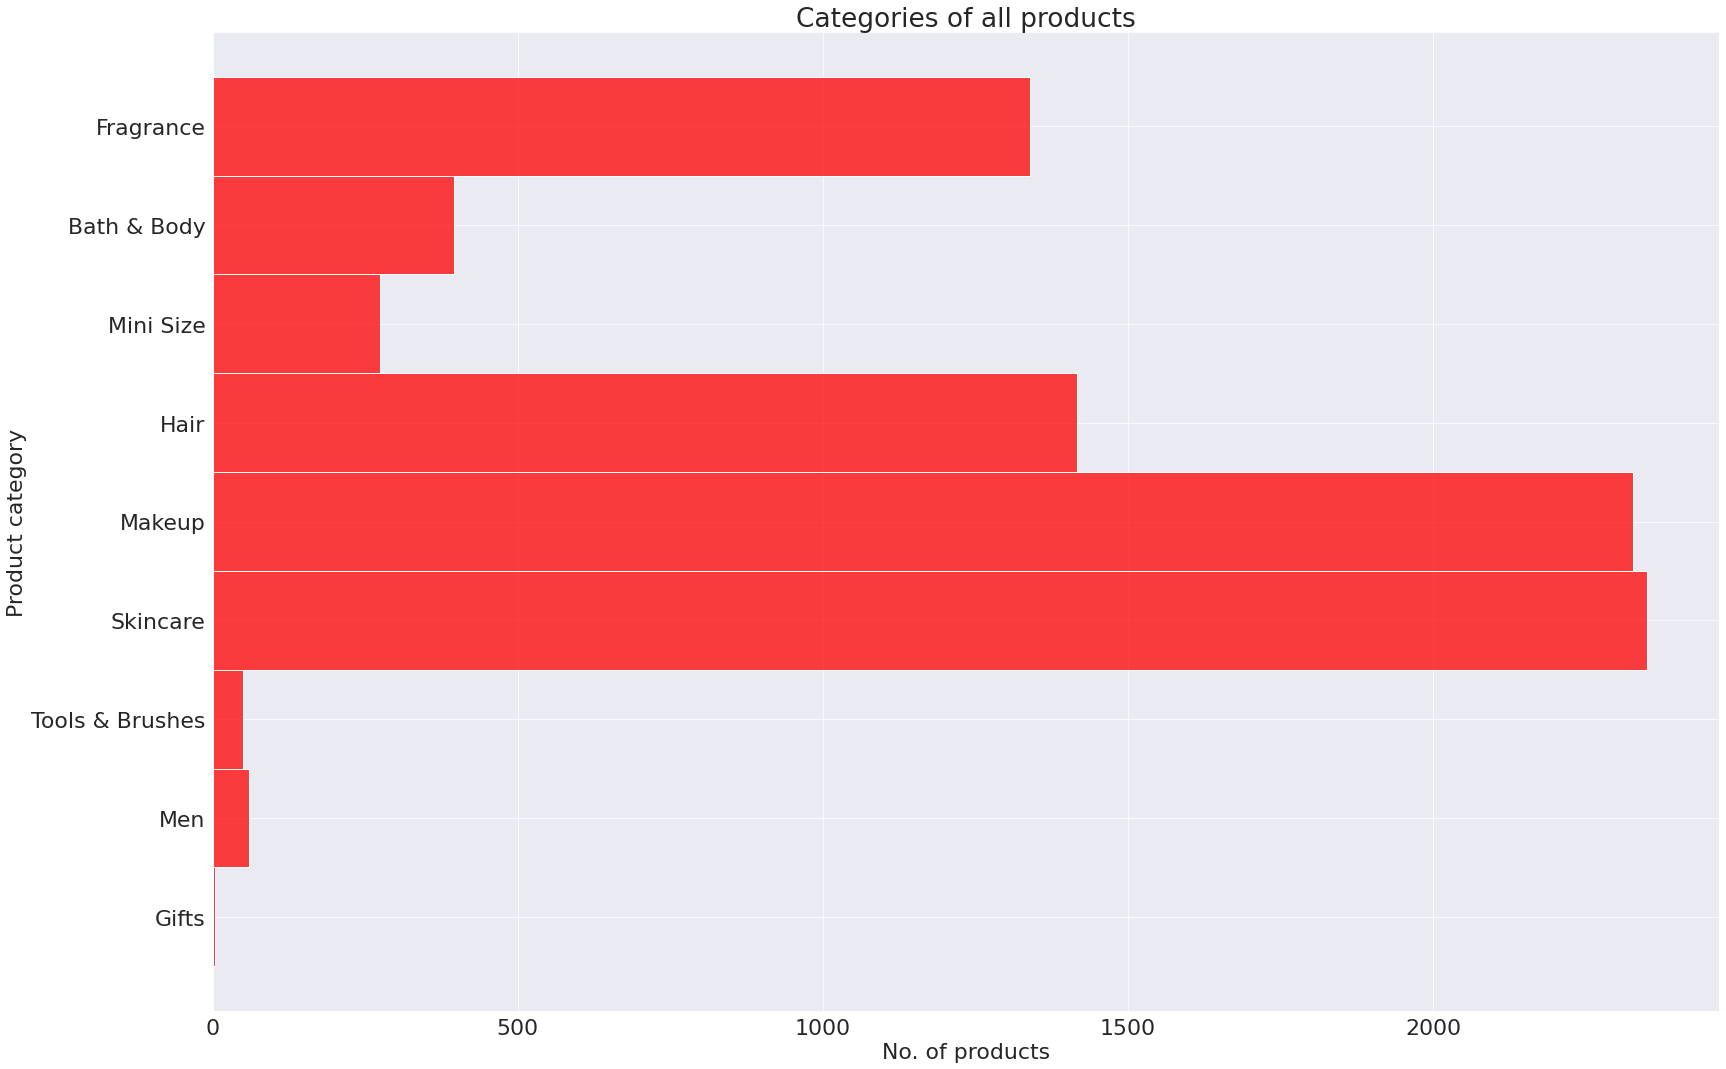

In [41]:
plt.figure(figsize=(27, 18))
sns.histplot(y = products_df['primary_category'],color = 'red')
plt.ylabel("Product category")
plt.xlabel("No. of products")
plt.title("Categories of all products")


Here we notice that while most of the products at Sephora fall in the Makeup and Skincare categories, the Fragrance category has the most products with the rating 5. 

It can also be useful to see which category has the most expensive products. We can do this by first grouping the dataframe on the basis of the categories and then finding the average price of products in each category and plotting a bar graph for the same.

In [42]:
categories_df = products_df.groupby('primary_category')[['price_usd']].mean()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price of products across different categories')

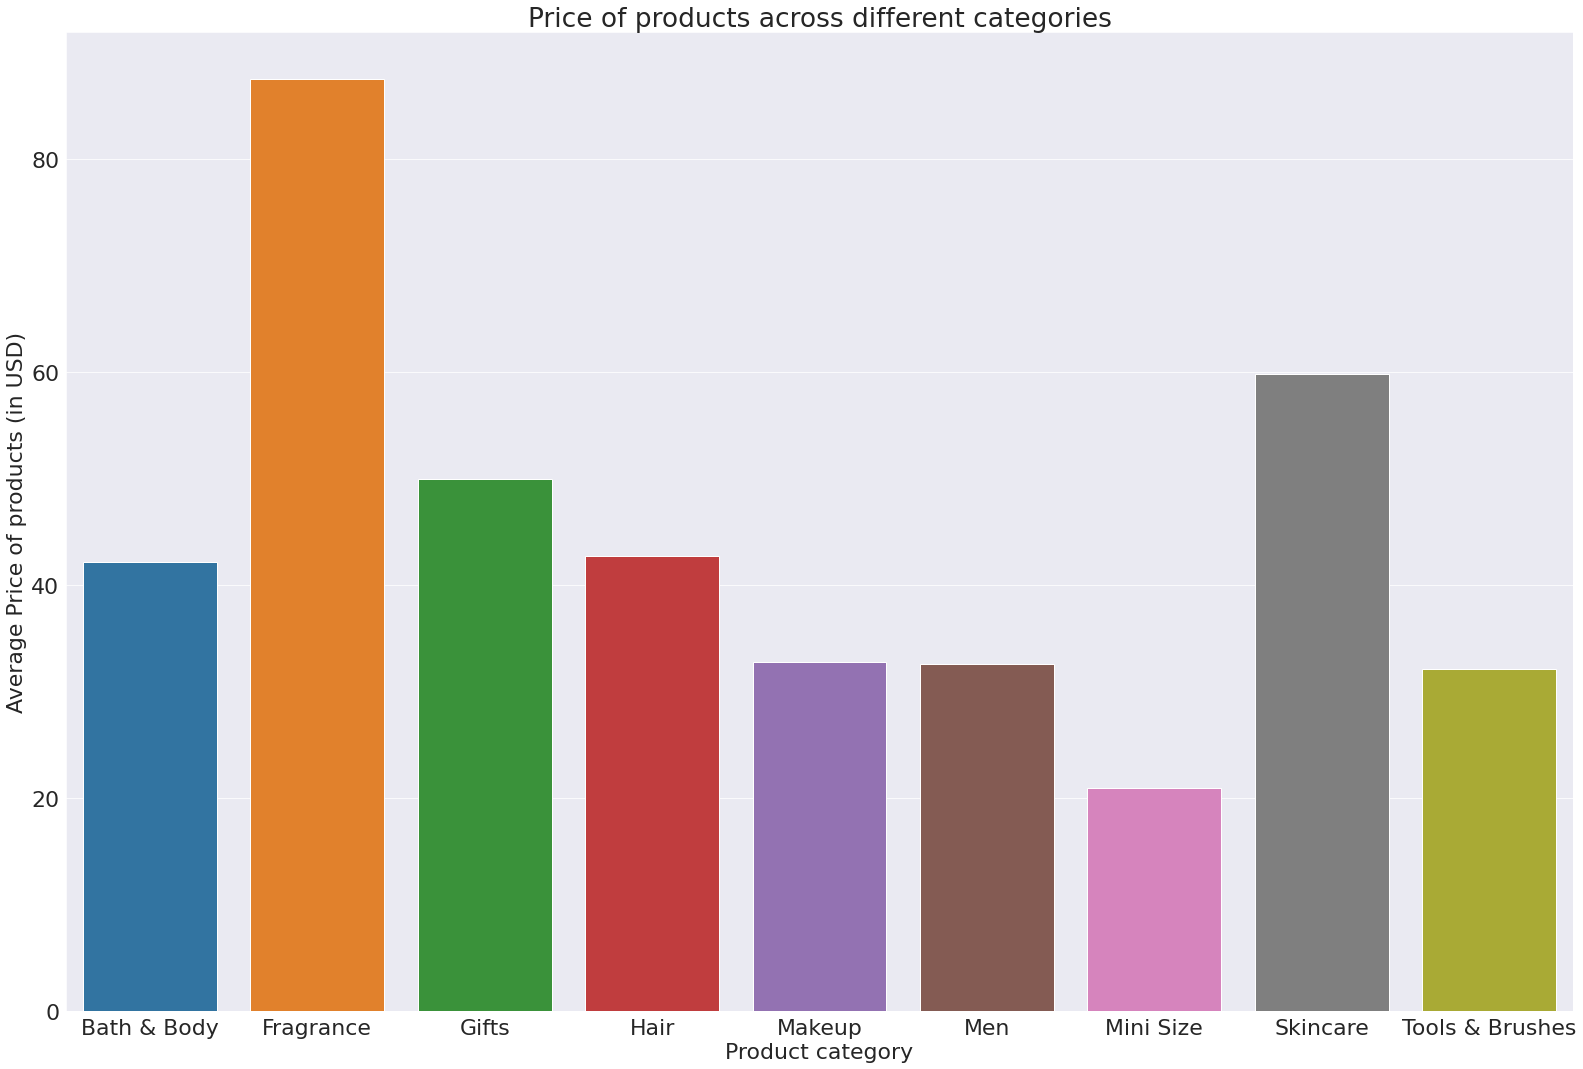

In [43]:
plt.figure(figsize=(27, 18))
sns.barplot( categories_df.index,categories_df['price_usd'])
plt.xlabel("Product category")
plt.ylabel("Average Price of products (in USD)")
plt.title("Price of products across different categories")

It turns out that average product price in the Fragrance category is higher than the average price of products across all the other categories

Lets also do some analysis on products that have the lowest rating of 1. While these products received a very low average rating I'm curious to know which brand among the products with lowest ratings received the highest and lowest number of loves counts. Again a barplot can be useful here.

Lets first create a dataframe of products with the lowest rating of 1

In [44]:
weak_df = products_df[products_df['rating']==1]

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Brands with lowest rating')

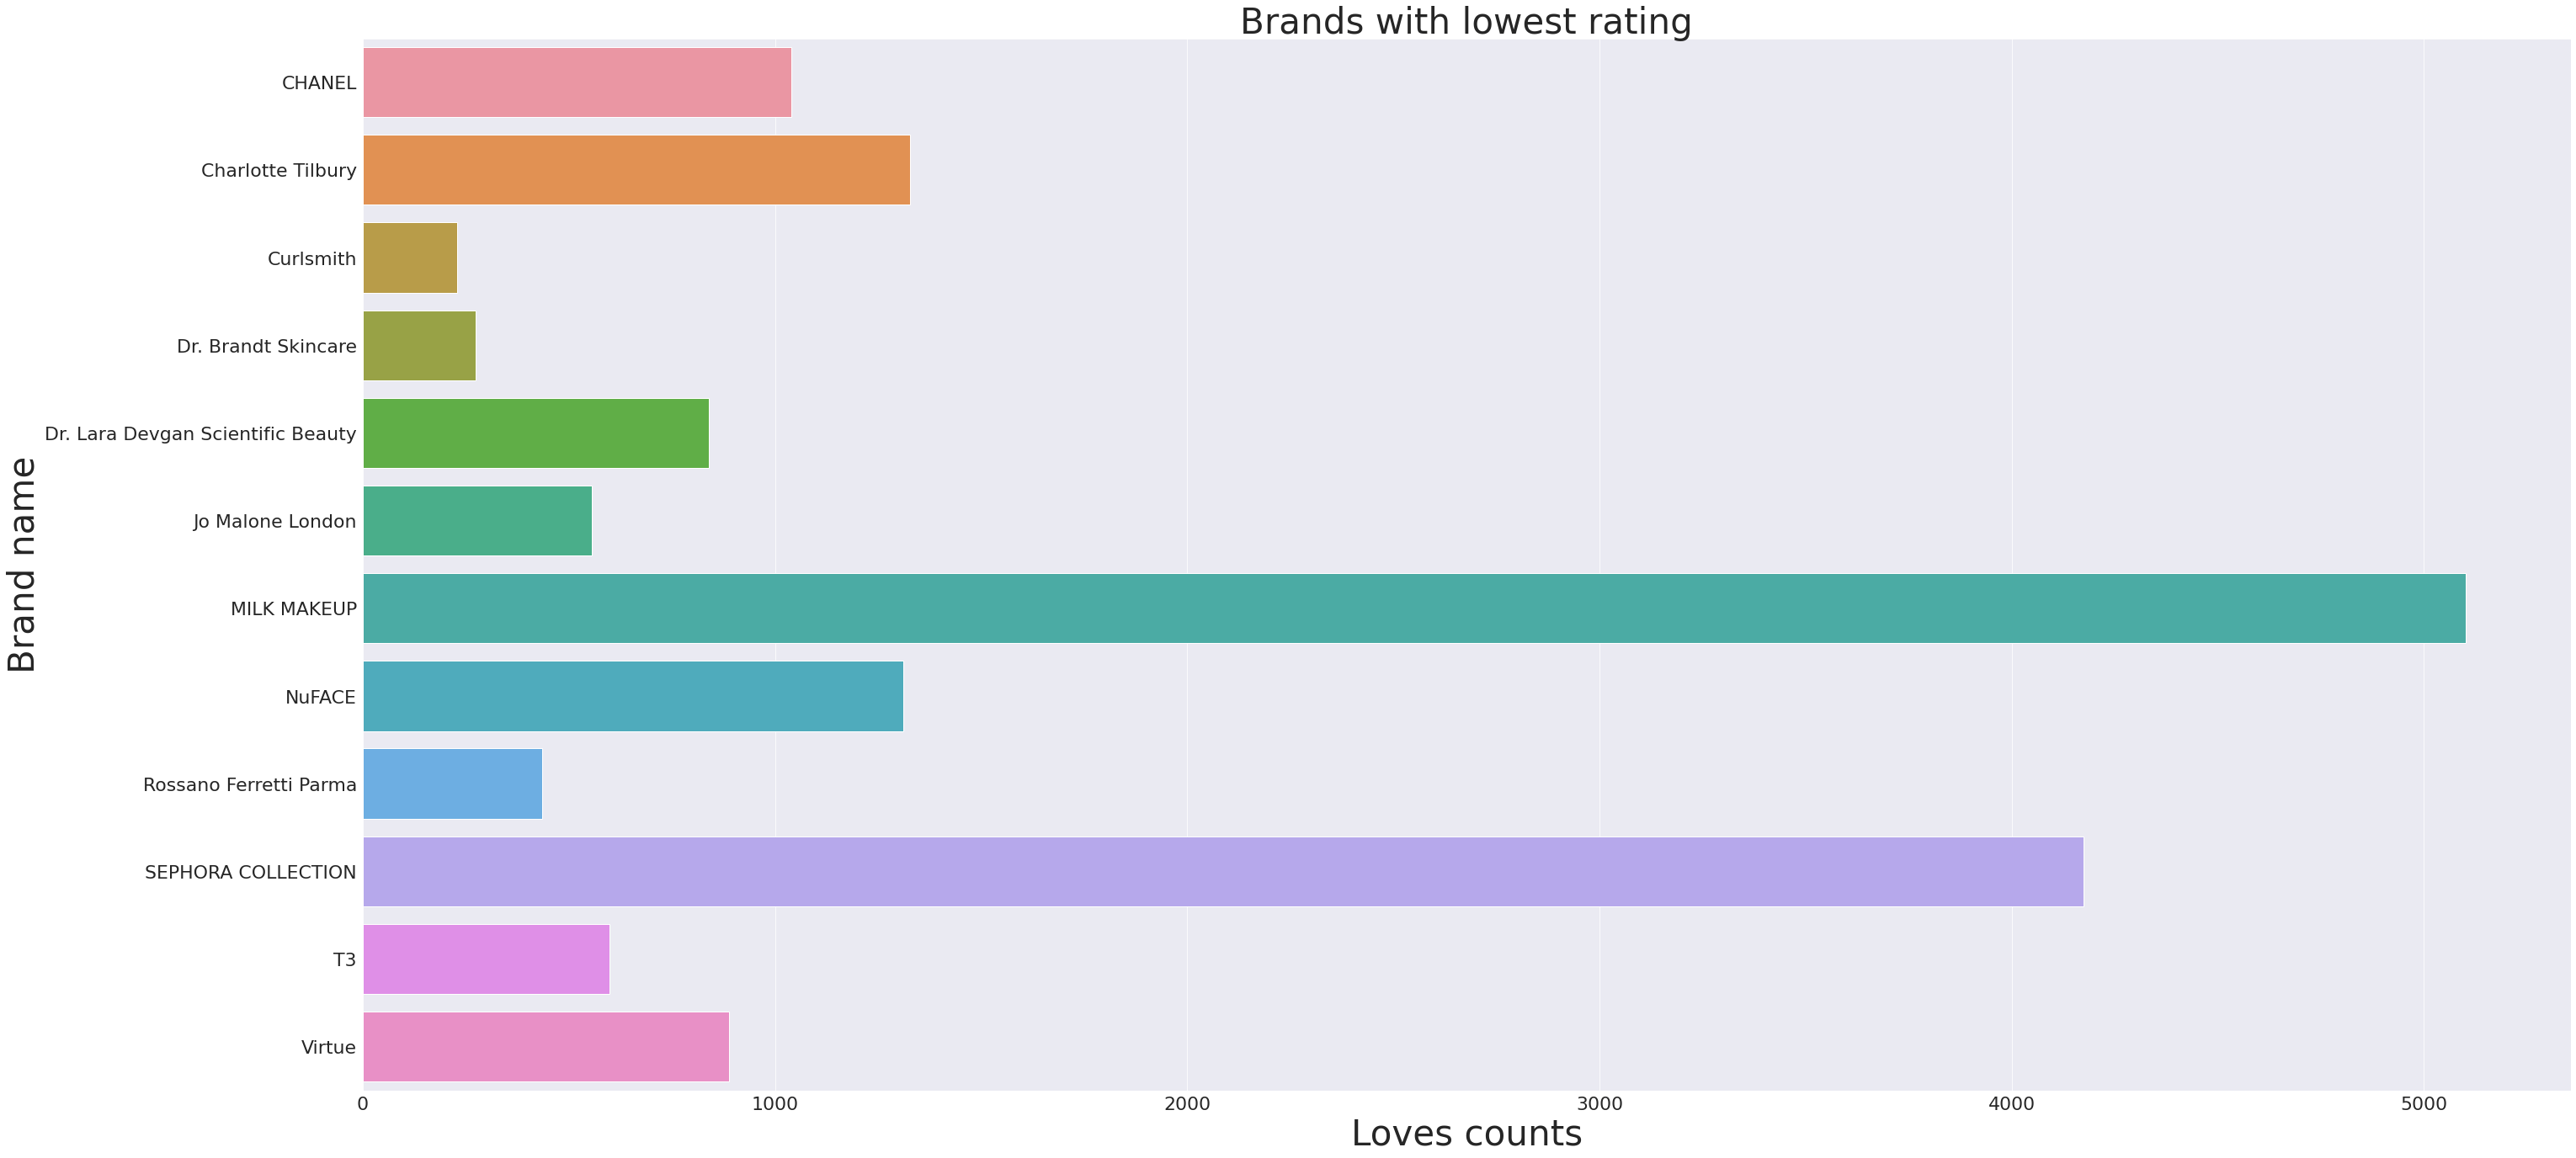

In [70]:
plt.figure(figsize=(47, 23))
sns.barplot( weak_df['loves_count'], weak_df['brand_name'])
plt.ylabel("Brand name", fontsize = 42)
plt.xlabel("Loves counts",fontsize = 42)
plt.title("Brands with lowest rating",fontsize = 42)


We notice that among all products with the lowest rating, the products from brand Milk Makeup have the most number of loves count, whereas the products from brand Curlsmith have the least number of loves count 

## Asking and Answering Questions

Lets dive deeper into this dataset by answering these 5 questions:



#### Q1: Which product received the most reviews and which product received the least? How were these products rated?

Lets use the max and min functions to find the highest number of reviews and lowest number of reviews

In [46]:
max_value = products_df['reviews'].max()
min_value = products_df['reviews'].min()

Now lets extract the rows that have these max and min review values

In [47]:
a = products_df[products_df['reviews'] == max_value].index
b = products_df[products_df['reviews'] == min_value].index


In [48]:
print("Product with the most number of reviews is "  + str(products_df.loc[a[0]]['product_name']) + " , rating: " + str(products_df.loc[a[0]]['rating']))
print("Product with the least number of reviews is " + products_df.loc[b[0]]['product_name']+ " , rating: " + str(products_df.loc[b[0]]['rating']))

Product with the most number of reviews is Tattoo Liner Vegan Waterproof Liquid Eyeliner , rating: 4.131
Product with the least number of reviews is Aperitivo In Terrazza Diffuser , rating: 5.0


#### Q2: Which products are the most and least expensive and how are they rated?

Lets first use the max and min functions to find the highest and lowest price of products in USD

In [49]:
max_value = products_df['price_usd'].max()
min_value = products_df['price_usd'].min()


Now lets extract the rows that have these max and min price values

In [50]:
a = products_df[products_df['price_usd'] == max_value].index
b = products_df[products_df['price_usd'] == min_value].index

In [51]:
print("The most expensive product is "  + str(products_df.loc[a[0]]['product_name']) + " , rating: " + str(products_df.loc[a[0]]['rating']))
print("The least expensive product is "  + str(products_df.loc[b[0]]['product_name']) + " , rating: " + str(products_df.loc[b[0]]['rating']))

The most expensive product is Shani Darden by Déesse PRO LED Light Mask , rating: 3.75
The least expensive product is Cleansing & Exfoliating Wipes , rating: 4.3383


#### Q3: How are the product prices distributed in the dataset?

Lets plot a histogram for this purpose

(0.0, 500.0)

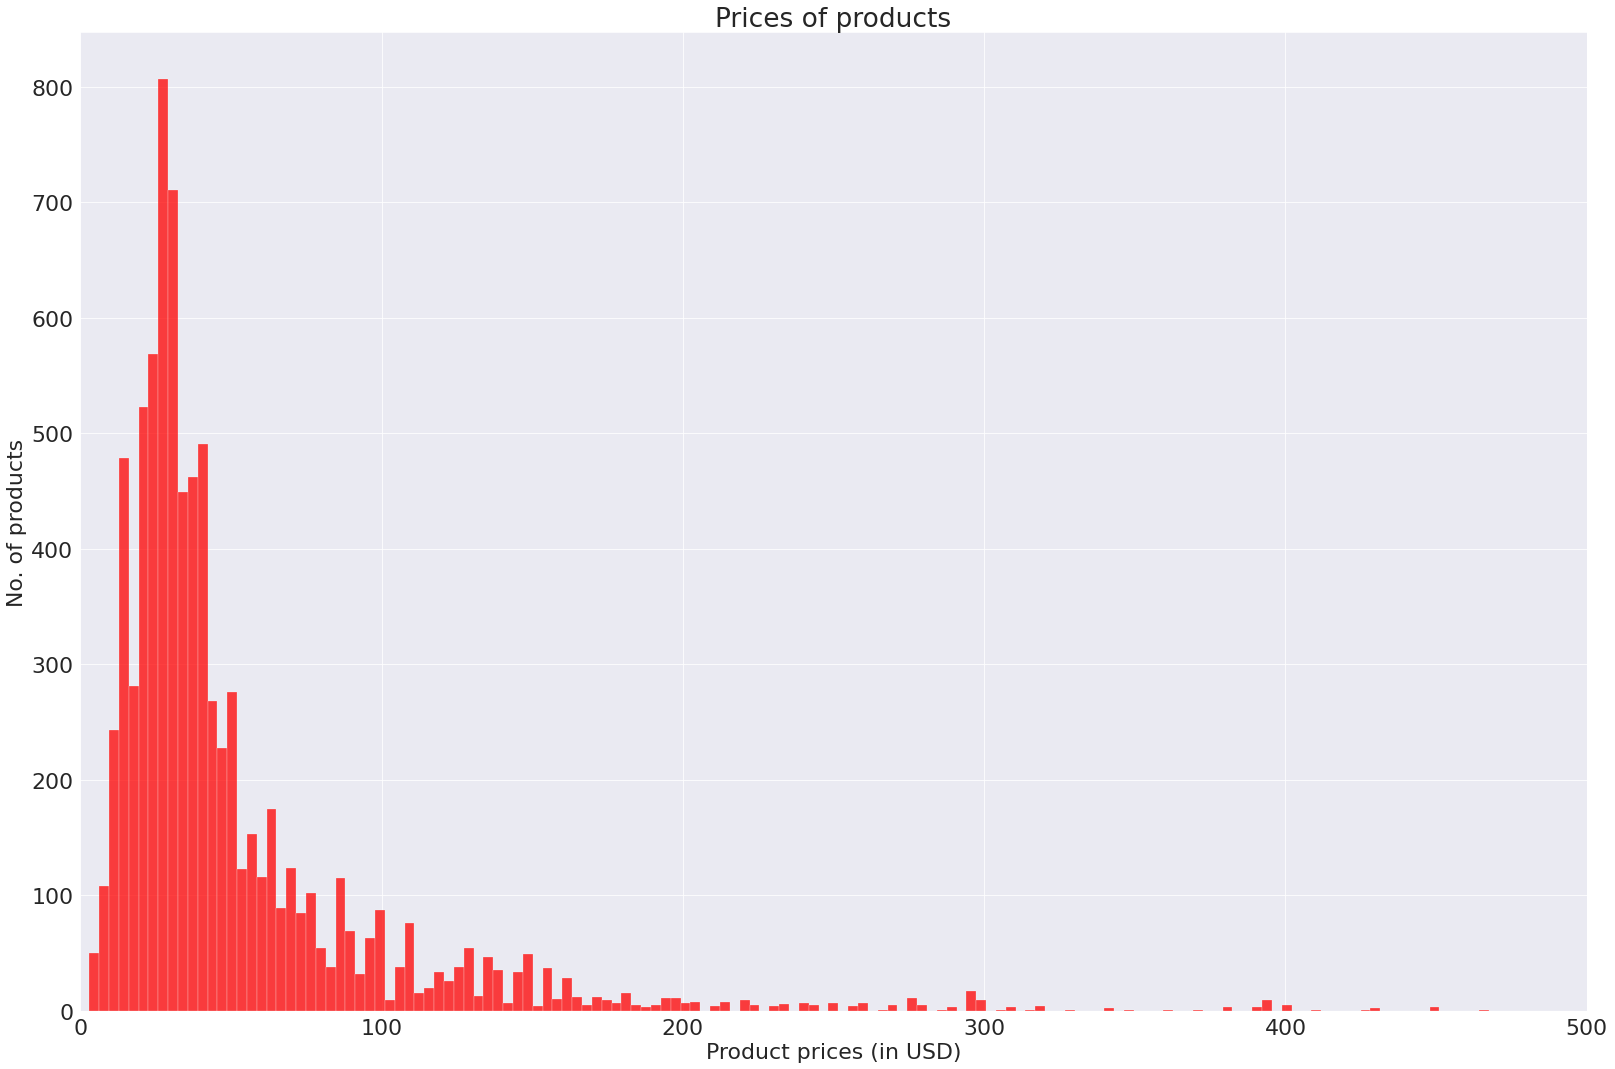

In [52]:
plt.figure(figsize=(27, 18))
sns.histplot(products_df['price_usd'],color = 'red')
plt.xlabel("Product prices (in USD)")
plt.ylabel("No. of products")
plt.title("Prices of products")
plt.xlim([0,500])


It is clear from this histogram that very few product prices are in the range 400- 500 and most of the product prices are in range 1 - 50 USD

#### Q4: Which brands are the most and least expensive?

For answering this question lets group our dataset by brand name and compute the average price of products for each brand  

In [53]:
group_by_brand_df = products_df.groupby('brand_name')[['price_usd']].mean()

Again we can use the max and min functions to compute the highest average price and lowest average price

In [54]:
max_value = group_by_brand_df['price_usd'].max()
min_value = group_by_brand_df['price_usd'].min()

Now lets extract the brand names that have these max and min price values

In [55]:
a1 = group_by_brand_df[group_by_brand_df['price_usd'] == max_value].index
b1 = group_by_brand_df[group_by_brand_df['price_usd'] == min_value].index


In [56]:
print("The most expensive brand is "  + str(a1[0]))
print("The least expensive brand is "  + str(b1[0]))

The most expensive brand is iluminage
The least expensive brand is Rosebud Perfume Co.


#### Q5: What percentage of all products are exclusive to Sephora?

All products exclusive to Sephora have 1 as the value in the sephora_exclusive column, we can extract them using this command:

In [57]:
sephora_df = products_df[products_df['sephora_exclusive'] == 1]

Now we can use the shape function to find out the number of products exclusive to sephora and number of products in the entire dataset. Lets compute the percentage using this formula:

In [58]:
percentage_value = (sephora_df.shape[0] * 100)/products_df.shape[0]

In [59]:
print (str(percentage_value) + "% of all products are exclusive to Sephora")

28.11587147030185% of all products are exclusive to Sephora


Let us save and upload our work to Jovian before continuing.

In [60]:
import jovian

In [61]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akkuvilas/analysis-of-sephora-products-and-skincare-reviews" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews


'https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews'

## Inferences and Conclusion

While Sephora is well known for its Makeup and Skincare products, customers also seem to like their Fragrance products quite a lot as they've been rated high by customers. Moreover the new and limited edition products at Sephora have also been received well by customers. 

In [62]:
import jovian

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akkuvilas/analysis-of-sephora-products-and-skincare-reviews" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews


'https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews'

## References and Future Work

**References**
https://www.kaggle.com/

It can also be quite useful to find out which products have the most positive and negative reviews. Later I also wish to make a recommendation system which analyses a customers' past purchases and recommends new products.

In [71]:
import jovian

In [72]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "akkuvilas/analysis-of-sephora-products-and-skincare-reviews" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews


'https://jovian.com/akkuvilas/analysis-of-sephora-products-and-skincare-reviews'